# Project notebook **<span style="COLOR:RED">Poker hand predictions</span>**


### Student 1 (first half presentation)
Name : MOMENI Alexandre <br>
Group: Intermediate
### Student 2 (second half presentation)
Name: NIELLY Cyprien <br>
Group: Intermediate 
<br>
### Data name: Poker Hand Data Set
### Data URL: http://archive.ics.uci.edu/ml/datasets/Poker+Hand
### Description :

This dataset was created by Robert Cattral and Franz Oppacher in January 2007 with the purpose to predict poker hands. The UCI Machine Learning repository hosts the dataset and Kaggle is running a classficiation competition on its website. <br />

The dataset description is summarised below: <br />

1. Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. <br />
<br />
2. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes.<br />
<br />
3. There is one Class attribute that describes the “Poker Hand”. <br />
<br />
4. Suits and ranks are represented as ordinal categories; Poker Hands are classified into ordinal categories. <br />
<br />
5. The order of cards is important, which is why there are 480 possible Royal Flush hands as compared to 4 (one for a each suit).<br />
<br />
6. Number of Instances: 25,010 training, 1,000,000 testing. <br />
<br />
7. Attribute Information:<br />

   a) S1 “Suit of card #1”
      Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

   b) C1 “Rank of card #1”
      Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

   c) S2 “Suit of card #2”
      Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

   d) C2 “Rank of card #2”
      Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

   e) S3 “Suit of card #3”
      Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

   f) C3 “Rank of card #3”
      Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

   g) S4 “Suit of card #4”
      Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

   h) C4 “Rank of card #4”
      Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

   i) S5 “Suit of card #5”
      Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

   j) C5 “Rank of card 5”
      Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

   k) CLASS “Poker Hand”
      Ordinal (0-9) <br />    
      
      0: Nothing in hand; not a recognized poker hand <br />
      1: One pair; one pair of equal ranks within five cards<br />
      2: Two pairs; two pairs of equal ranks within five cards<br />
      3: Three of a kind; three equal ranks within five cards<br />
      4: Straight; five cards, sequentially ranked with no gaps<br />
      5: Flush; five cards with the same suit<br />
      6: Full house; pair + different rank three of a kind<br />
      7: Four of a kind; four equal ranks within five cards<br />
      8: Straight flush; straight + flush<br />
      9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush<br />
      <br />

### Aims: 
The dataset has been found to be a challenging for classification algorithms. Our project focuses on understanding why this is the case and will make a first attempt to address these obstacles in a classical classifier. More specifically, we will follow the steps below: <br />
     
** <span style="color:darkblue">1. Preliminary checks:</span> **  Are there any preprocessing requirements ? <br />
<br />
**<span style="color:darkblue">2. Statistics: </span>**  Is the data set representative of probability theory? <br />
<br />
**<span style="color:darkblue">3. Discovery of the rules of poker: </span>** Can an unsupervised learning algorithm achieve automatic rule induction? <br />
<br />
**<span style="color:darkblue">4. Prediction of poker hands: </span>** Can the previous analysis help construct a good classifier which can learn the rules without hand coding heuristics ?<br />
<br />
**<span style="color:darkblue">5. Discuss and examine the findings: </span>** What are the implications of our results?<br />
<br />


### Modules: 
We note that the purpose of the project is also to demonstrate our understanding of the Python course. Thus we have opted against using more advanced machine learning modules that include built-in algorithms. Whilst these may have been better suited to run the analysis, we have instead focused on implementing reproducible elementary code. With this in mind, we will comment the code to help the reader follow the various steps. <br />
<br />
We import and use the modules below throughout the project: 

In [1]:
import math
import time
import urllib.request as ur
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### Importing Data

In [2]:
######## donwload data ###########
print('Downloading data...')

#Store URLs
url_training = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
url_testing = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"

#Retrieve data denoted by the URLs and save in csv format as local files in the current directory. 

#ur.urlretrieve(url_training,"poker-hand-training.csv") # to download and save file from web to current directory
#ur.urlretrieve(url_testing,"poker-hand-testing.csv")# to download and save file from web to current directory

print('Download complete.')

########## Loading the data into Pandas ##########
labels= ['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS']
df_train = pd.read_csv("poker-hand-training.csv", header=None,names=labels)
df_test = pd.read_csv("poker-hand-testing.csv", header=None, names=labels)

print('Datasets are loaded in Pandas DataFrame - start exploring!')

Download complete.
Datasets are loaded in Pandas DataFrame - start exploring!


### 1. Preliminary checks
In this first section, we will establish whether there are any corrupt or missing values in the datasets. This small step is important for good practise to ensure that the datasets are consistent with the description above.  

In [3]:
print('The number dimensions are consistent with the instance and attribute description')
print('Train set dimensions',df_train.shape)
print('Test set dimensions',df_test.shape)

The number dimensions are consistent with the instance and attribute description
Train set dimensions (1000000, 11)
Test set dimensions (1000000, 11)


In [4]:
print('The column names and their ordering are consistent with the attribute description')
print('Train set column labels:',df_train.columns)
print('Test set column labels:',df_test.columns)

The column names and their ordering are consistent with the attribute description
Train set column labels: Index(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS'], dtype='object')
Test set column labels: Index(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS'], dtype='object')


In [5]:
print('The dtypes (integers) are consistent with the value description. We note there are no missing values (non-null) ')
df_train.info()
df_test.info()

The dtypes (integers) are consistent with the value description. We note there are no missing values (non-null) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
S1       1000000 non-null int64
C1       1000000 non-null int64
S2       1000000 non-null int64
C2       1000000 non-null int64
S3       1000000 non-null int64
C3       1000000 non-null int64
S4       1000000 non-null int64
C4       1000000 non-null int64
S5       1000000 non-null int64
C5       1000000 non-null int64
CLASS    1000000 non-null int64
dtypes: int64(11)
memory usage: 83.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
S1       1000000 non-null int64
C1       1000000 non-null int64
S2       1000000 non-null int64
C2       1000000 non-null int64
S3       1000000 non-null int64
C3       1000000 non-null int64
S4       1000000 non-null int64
C4       1000000 non-null int64
S5       100000

In [6]:
print('The unique values of the dataframes are consistent with the description')

The unique values of the dataframes are consistent with the description


In [7]:
for i in range (11):
    print('Train set unique values for attribute',labels[i],'are:',sorted(df_train[labels[i]].unique()))

Train set unique values for attribute S1 are: [1, 2, 3, 4]
Train set unique values for attribute C1 are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Train set unique values for attribute S2 are: [1, 2, 3, 4]
Train set unique values for attribute C2 are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Train set unique values for attribute S3 are: [1, 2, 3, 4]
Train set unique values for attribute C3 are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Train set unique values for attribute S4 are: [1, 2, 3, 4]
Train set unique values for attribute C4 are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Train set unique values for attribute S5 are: [1, 2, 3, 4]
Train set unique values for attribute C5 are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Train set unique values for attribute CLASS are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
for i in range (11):
    print('Test set unique values for attribute',labels[i],'are:',sorted(df_test[labels[i]].unique()))

Test set unique values for attribute S1 are: [1, 2, 3, 4]
Test set unique values for attribute C1 are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Test set unique values for attribute S2 are: [1, 2, 3, 4]
Test set unique values for attribute C2 are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Test set unique values for attribute S3 are: [1, 2, 3, 4]
Test set unique values for attribute C3 are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Test set unique values for attribute S4 are: [1, 2, 3, 4]
Test set unique values for attribute C4 are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Test set unique values for attribute S5 are: [1, 2, 3, 4]
Test set unique values for attribute C5 are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Test set unique values for attribute CLASS are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


**<span style="color:darkblue">Conclusion: </span>** We conclude the preliminary checks above confirm that the datasets provided are consistent with the description and do not require pre-processing. <br />
<br />
Before moving onto the next section, the reader will find the first few rows of each dataframes below.    

In [9]:
print('Train Data')
df_train.head()

Train Data


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [10]:
print('Test Data')
df_test.head()

Test Data


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


### 2. Statistics
In this second section, we use theory to obtain the combinations, permutations and probabilities of the different CLASS outcomes. The objective here is not to gain insight into the ranking of poker hands but to examine whether the CLASS Distribution within each dataset is representative of the true domain. Remember: The order of cards is important.

In [11]:
#First, we compute the class distributions in the two datasets
#This means that for each class, we compute the ratio r_i = (num of instances of class i) / (total number of instances)

train_class_distribution = df_train.iloc[:,10].value_counts(normalize=True, sort=False)
test_class_distribution = df_test.iloc[:,10].value_counts(normalize=True, sort=False)

In [12]:
#We define the function nCr, also known as the Binomial coefficient (http://mathworld.wolfram.com/BinomialCoefficient.html)

def nCr(n,r):
    assert (type(n) == int),"n is not an integer"
    assert (type(r) == int),"n is not an integer"
    assert ( n > 1), "n is not greater than 1" 
    assert ( r > 0), "r is not greater than 0" 
    assert ( n >= r), "r is greater than n" 
    
    f = math.factorial
    return f(n) / (f(r)*f(n-r))

In [13]:
#First we we compute the number of hands. The reader is invited to check these himself. 

royal_flush = 4 
#This consists of the ten, jack, queen, king, and ace of one suit. There are four such hands.

straight_flush = 10 * 4 - 4
#10 ways of having a 5 card sequence, with only one pattern of suit allowed (4 combinations). 
# We exlude royal flushes

one_pair = nCr(13,1) * nCr(4,2) * nCr(12,3) * (4**3)
#We have to choose 1 distinct kind (13-choose-1) in any 2 patterns (4-choose-2)
#From the remaining 12 distinct kinds, we chose 3 distinct kinds (12-choose-3), with any pattern of suits (4^3 combinations)

two_pair = nCr(13,2) * nCr(4,2) * nCr(4,2) * nCr(11,1) * 4 
#We have to choose 2 distinc kinds (13-choose-2) in any 2 patterns (13-choose-2)(4-choose-2)(4-choose-2)
#From the remaining 11 distinct kinds, we choose .1 distinct kinds with any pattern (11-choose-1)(4-choose-1)

three_of_a_kind =  nCr(13,1) * nCr(4,3) * nCr(12,2) * (4**2)
#We have to choose 1 distinct kind (13-choose-1) in any 3 patterns (4-choose-3)
#From the remaining 12 distinct kinds, we chose 2 distinct kinds (12-choose-2), with any pattern of suits (4^2)

straight = 10 * (4**5) - 36 - 4 
#10 ways of having a 5 card sequence, with any pattern of suits (4^5)
#We exclude flush straights
#We exclude royal flush 

nothing = (nCr(13,5) - 10) * (4**5 - 4)
#We have to choose 5 distinct kinds (13-choose-5) but exclude any straights (subtract 10). 
#We can have any pattern of suits except the 4 patterns where all 5 cards have the same suit: 4^5-4. 

flush = nCr(13,5)* 4 - 4*10
#We have to choose 5 distinct kinds (13-choose-5) from the same pattern(4)
#We exclude straight flushes 

full_house = nCr(13,1) * nCr(4,3) * nCr(12,1) * nCr(4,2)
#We have to choose 1 distinct kind (13-choose-1) in any 3 patterns (4-choose-3)
#From the remaining 12 distinct kinds, we chose 1 distinct kind (12-choose-2), in any 2 patterns suits (4-choose-2)

four_of_a_kind = nCr(13,1) * nCr(12,1) * 4
#We have to choose 1 distinct kind (13-choose-1) in all 4 patterns (4-choose-4)
#From the remaining 12 distinct kinds, we chose 1 distinct kinds (12-choose-1), with any pattern of suits (4)

total = nCr(52,5)
#From a deck of 52 cards, there are 52-choose-5 ways of choosing 5 cards. 

In [14]:
#The order of cards is important! We compute the number of combinations for each of these hands.

combination_factor = 5*4*3*2*1
#5 ways of drawing the first card, 4 ways of drawing the second, etc... 

In [15]:
#We create a Pandas DataFrame to summarise our theoretical findings 

hands_counts = [nothing,one_pair,two_pair,three_of_a_kind,straight,
                flush,full_house,four_of_a_kind,straight_flush,royal_flush]

hands_names = ["Nothing", "One pair", "Two pairs", "Three of a kind", "Straight", 
               "Flush", "Full house", "Four of a kind", "Straight flush", "Royal flush"]

statistics_dict = {'Poker Hand' : hands_names, 'Class Distribution (train)': train_class_distribution,
                   'Class Distribution (test)': test_class_distribution, '# of theoretical hands': hands_counts}

statistics_df = pd.DataFrame(statistics_dict,columns=statistics_dict.keys())
statistics_df.set_index('Poker Hand')

statistics_df['# of combinations'] = statistics_df.iloc[:,3] * combination_factor 
statistics_df ['probability'] = statistics_df.iloc[:,3]/ total

assert(statistics_df.probability.sum()==1),"The sum of probabilities is not equal to 1"

probability_df = statistics_df.copy()
probability_df = probability_df.drop('# of combinations',axis=1)
probability_df = probability_df.drop('# of theoretical hands',axis=1)

probability_df


,Poker Hand,Class Distribution (train),Class Distribution (test),probability
0,Nothing,0.501209,0.501209,0.501177
1,One pair,0.422498,0.422498,0.422569
2,Two pairs,0.047622,0.047622,0.047539
3,Three of a kind,0.021121,0.021121,0.021128
4,Straight,0.003885,0.003885,0.003925
5,Flush,0.001996,0.001996,0.001965
6,Full house,0.001424,0.001424,0.001441
7,Four of a kind,0.000230,0.000230,0.000240
8,Straight flush,0.000012,0.000012,0.000014
9,Royal flush,0.000003,0.000003,0.000002


In [16]:
#We now compare the Class Distribution of the datasets to the theoretical value 

statistics_df['Train / Theory Ratio'] = statistics_df.iloc[:,1] / statistics_df.iloc[:,5]
statistics_df['Test / Theory Ratio'] = statistics_df.iloc[:,2] / statistics_df.iloc[:,5]

probability_ratios = statistics_df.iloc[:,[0,6,7]]
probability_ratios

,Poker Hand,Train / Theory Ratio,Test / Theory Ratio
0,Nothing,1.000063,1.000063
1,One pair,0.999832,0.999832
2,Two pairs,1.001746,1.001746
3,Three of a kind,0.999647,0.999647
4,Straight,0.989898,0.989898
5,Flush,1.015569,1.015569
6,Full house,0.988493,0.988493
7,Four of a kind,0.957950,0.957950
8,Straight flush,0.866320,0.866320
9,Royal flush,1.949220,1.949220


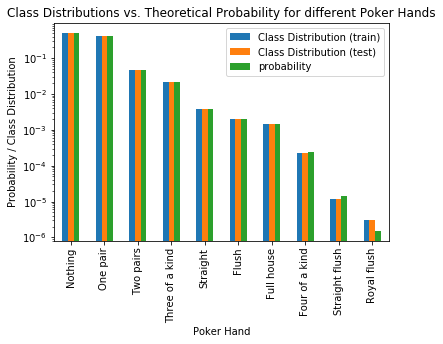

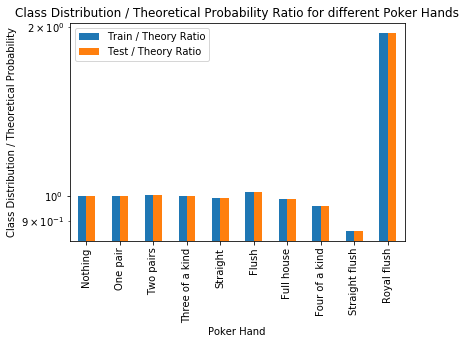

In [17]:
#Probability vs. Class Distribution Plot
statistics_df.iloc[:,[0,1,2,5]].plot.bar(x='Poker Hand')
plt.xlabel('Poker Hand')
plt.ylabel('Probability / Class Distribution')
plt.yscale('log')
plt.title('Class Distributions vs. Theoretical Probability for different Poker Hands')
plt.show()

#Ratio Class Distribution / Probability Plot
probability_ratios.plot.bar(x='Poker Hand')
plt.xlabel('Poker Hand')
plt.ylabel('Class Distribution / Theoretical Probability')
plt.yscale('log')
plt.title('Class Distribution / Theoretical Probability Ratio for different Poker Hands')
plt.show()

The value in the ratio indicates the representation within the relevant set as compared to the entire domain. 1.0 would be perfect representation, while <1.0 are under-represented and >1.0 are over-represented. We notice that in the training dataset, the Straight flush and royal flush hands are not as representative of the true domain because they have been over-sampled: <br />
1. The Straight flush is 14.43 times more likely. 
2. The Royal flush is 129.82 times more likely.<br />
 

**<span style="color:darkblue">Conclusion: </span>**Whilst the observations and analysis above might raise suspicion about the data, this can be explained by the class imbalance problem that exists in machine learning. Indeed, when the total number of observations for certains classes in data (often the most important classes e.g. rare diseases, fraud detection) is far smaller than the total number of other classes in the data, standard classification algorithms tend to be overwhelmed by the majority classes and ignore the minority classes. This is due to the fact that straditional classifiers seek an accurate performance over a full range of instances. Thus, oversampling  aims to re-balance class distributions. More details on the class imbalance problem can be found the following paper discussing the popular SMOTE method for oversampling (https://www.jair.org/media/953/live-953-2037-jair.pdf). <br />
<br />
As we move onto the next section, the reader should be sure to reflect on the results of this analysis and its implications for the remainder of the project.

### 3. Discovery of the rules of poker

In the previous two sections, we determined that our datasets were clean and sampled to deal with the class imbalance problem. In this third section, we ask the reader to pretend they are in a foreign land and that they have never played poker before. We are given a history of thousands of games and are asked to come up with the rules. For clarity, this implies that this section will focus solely on the first ten columns of training set. <br />
<br />
This calls for an unsupervised learning technique - in particular, since we are dealing with mixed data, we will focus on building partitions via variants of k-means clustering for mixed data (details will be given on the algorithm below).<br />
<br /> 

**<span style="color:darkblue">Distance Definition: </span>** The first challenge of this section lies in defining a sensible distance between two hands. We must reflect both the binary nature of the suits and the rank of the card.<br />
<br />
We choose the Gower Distance (http://venus.unive.it/romanaz/modstat_ba/gowdis.pdf). <br />
<br />
Speficially, for the records $i$ and $j$ and a dataset consisting of $p$ dimensions, the Gower distance is defined as follows: <br />
<br />
$d_{ij} = \sum_{k=1}^{p} w_k \ d_{ij}^{ \ (k) \ }$ <br />

In the above formula, the contributions to the Gower distance of each individual dimension $k$ is entailed in the distance $d^{\ (k) \ }$ that can be defined in a proper way for each $k$.  The $w_{k}$ represent a suitable set of weights that can be used to average single-axis distances <br />

For the poker hand instances, we have: <br />

For numerical variables (ranks): $d_{ij} = \frac{\left| \ x_{i}^{ \ (k) \ } - x_{j}^{ \ (k) \ }\right|}{R^{ \ (k) \ }}$ where $R^{ \ (k) \ }$ sets the scale and is the total range of the $k$-th variable. <br />
<br />
For categorical variables (suits):
$d_{ij}=0$ if $x_i\ = \ x_j$ and 1 otherwise. 


In [18]:
#We create the dataset for this section 
x_train = df_train.copy() #Store a copy of the training set
x_train = x_train.drop('CLASS', axis=1) #Remove the final colum 
x_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,1,13,2,4,2,3,1,12
1,3,12,3,2,3,11,4,5,2,5
2,1,9,4,6,1,4,3,2,3,9
3,1,4,3,13,2,13,2,1,3,6
4,3,10,2,7,1,2,2,11,4,9


In [19]:
x_train = x_train.values #Transform into numpy array

In [20]:
#We define the Gower Distance function for the distance between two hands. 
#The range of the rank is 12.
#We set the total weights to 90% for the rank distances and 10% for the sign distance. 

def hand_distance(hand1, hand2):
    
    assert (type(hand1) == np.ndarray),"hand1 is not an numpy array"
    assert (type(hand2) == np.ndarray),"hand2 is not an numpy array"
    
    d = 0.0 
    for i in range (5):
        d += 0.02 * int(hand1[2*i] != hand2[2*i])
        d += 0.18 * abs(hand1[2*i+1] - hand2[2*i+1])/12
    
    return d

In [21]:
#Example Gower Distance 
print(x_train[0])
print(x_train [1])
print('The Gower Distance between the first two lines of the training set is:',hand_distance(x_train[0],x_train[1]))

[ 1  1  1 13  2  4  2  3  1 12]
[ 3 12  3  2  3 11  4  5  2  5]
The Gower Distance between the first two lines of the training set is: 0.67


**<span style="color:darkblue">K-medoids and K-medians </span>**: Now that the distance is define, the second challenge of this section lies in choosing the algorithm to discover the rules. <br />

**<span style="color:darkblue">K-medoids: </span>**  Instead of calulating the mean of a cluster, one instead calculates the median.  The general methodology is outlined below:<br />
1. Intialize k clusters with K++ <br />
2. Associate each instance to its closest medoid <br />
3. Within each cluser, while the total cost decreases (where cost is defined in terms of pairwise distances): <br />
    a) For each medoid m and non-medoid o: <br />
    i. Swap m and o, recompute the costs <br />
    ii. If the total costs of the clustering increased, undo the swap. <br />
<br />
The medoid is thus defined as the point that minimizes the total within-cluster distances. Note that K-medoids guarantees that the cluster medoid is among the cluster members. The key drawback is that K-medoids will be computationally expensive, since it involves computation of all the pairwise distances in a cluster. Given our training set is very large, we will opt against using K-medoids for our initial analysis. We will however provide the code for the algorithm here for completeness as it will be used in the next section to help pre-process the data for the classification.
<br />

**<span style="color:darkblue">K-medians: </span>** K medians methodology for cluster calculations: <br />
 <br />
1. Intialize k clusters with with K++  <br />
2. 
    a) Assign each observation to the a cluster corresponding to the "nearest" centroid using hand distance. <br />
    b) Calculate the new medians to be the new centroids of the observations in the clusters. <br />
    
3. until convergence, i.e. until the new centroids are the same as the old centroids. <br />
 <br />
Full paper: https://pdfs.semanticscholar.org/2e7f/4940ff6d2b4cd925a9dcc78ab4827e3dd8a9.pdf
 <br />
We will use this algorithm for this section. 

**<span style="color:darkblue">Initialization</span>**: The initalization mechanism will be performed using THE K++ algorithm. The curious reader can find the details in the paper here http://ilpubs.stanford.edu:8090/778/1/2006-13. The general methodology is outlined below. <br />
<br />
1. We choose first cluster medoid uniformly at random from among the data points
2. Associate each instance to its closest medoid.
3. a) For each data point, we compute the squared distance between the data point and the nearest existing medoid.
    b) Then we choose one new data point at random as a new center using a weighted probability distribution. Each point is chosen with probability proportional to the squared distance.<br />
4. We repeat the two steps in 2. until k centers have been chosen.<br />
<br />

In [22]:
#We define the K++ using the Gower Distance

def k_PP (data, k):
      
    assert (type(k) == int),"k is not an integer"
    assert ( k > 0), "k is not greater than 0"
    assert (type(data) == np.ndarray), "data is not an numpy array"
    
    #We choose the first medoid from the data
    n_rows, n_cols = data.shape
    medoids = []
    medoids_id = np.random.randint(n_rows)
    medoids.append(data[medoids_id])
    
    #We choose the remaining k-1 medoids from the data 
    while len(medoids) < k:
        distance= np.array([min([hand_distance(medoids[i],data[j])**2 for i in range(len(medoids))]) for j in range (n_rows)])    
        weighted_probs = distance/distance.sum()
        cumulative_probs = weighted_probs.cumsum()
        q = np.random.rand()
        medoids_id = np.where(cumulative_probs >= q)[0][0]
        medoids.append(data[medoids_id])        
         
    return medoids

In [23]:
def k_medians (data, k, max_iter=100):
    
    assert (type(k) == int),"k is not an integer"
    assert ( k > 0), "k is not greater than 0"
    assert (type(data) == np.ndarray), "data is not an numpy array: %r"
    
    
    #Initial Centroid set
    n_rows, n_cols = data.shape
    centroids = k_PP(data,k)  
    iteration = 1
    
    #Calculating New Centroids Until Convergence
    while (iteration < max_iter):             
        
        iteration += 1
        clusters = np.array([np.argmin([hand_distance(centroids[i],data[j]) for i in range(len(centroids))]) for j in range (n_rows)])
        new_centroids = []
        
        for i in range(k):    
            new_centroids.append(np.median(data[clusters == i],axis=0))
            
        if np.array_equal(new_centroids, centroids):
            print("For",k,"clusters, convergence is achieved after",iteration ,"iterations.")
            break
        
        else: 
            centroids = new_centroids
            
    return centroids

In [ ]:
def k_medoids (data, k, max_iter=100):
    
    assert (type(k) == int),"k is not an integer"
    assert ( k > 0), "k is not greater than 0"
    assert (type(data) == np.ndarray), "data is not an numpy array: %r"
    
    #Initial Medoid set
    n_rows, n_cols = data.shape
    medoids = k_PP(data,k)  
    iteration = 1
    
    
    #Calculating New Medoids Until Convergence
    while (iteration < max_iter):             
        
        iteration += 1
        clusters = np.array([np.argmin([hand_distance(medoids[i],data[j])**2 for i in range(len(medoids))]) for j in range (n_rows)])
        new_medoids = []
        
        for i in range(k):
            memb_ids = np.where(clusters == i)
            partition = data[memb_ids]
            p_rows, p_cols = partition.shape
            distance = np.array([np.sum([hand_distance(partition[i],partition[j])**2 for i in range(p_rows)]) for j in range (p_rows)])
            min_distance = np.argmin(distance)
            new_medoids.append(partition[min_distance])
                                         
        if np.array_equal(new_medoids, medoids):
            print("For",k,"clusters, convergence is achieved after",iteration ,"iterations.")
            break
        
        else: 
            medoids = new_medoids
            
    return medoids

We will now run the K-Medians algorithm on the dataset for different values of k and compute the inertia. This will give us an indication of the quality of the partition achieved and help select the natural number of clusters / classes. **Note: The cell below with take 5 minutes to run**: 

In [ ]:
s_time = time.time()

cluster_id = []
total_inertia_list = []
marginal_k = []
rows, cols = x_train.shape

for k in range(2,10):
    
    cluster_id.append(k)
    medoids = k_medians(x_train,k)
    inertia = np.array([min([hand_distance(medoids[i],x_train[j]) for i in range(len(medoids))]) for j in range (rows)])
    total_inertia = inertia.sum() / rows
    total_inertia_list.append(total_inertia)

e_time = time.time()

print('Elapsed time : ' + str(e_time-s_time))

For 2 clusters, convergence is achieved after 4 iterations.
For 3 clusters, convergence is achieved after 3 iterations.
For 4 clusters, convergence is achieved after 5 iterations.
For 5 clusters, convergence is achieved after 5 iterations.
For 6 clusters, convergence is achieved after 5 iterations.


In [ ]:
pd.DataFrame(list(zip(cluster_id,total_inertia_list)), columns = ["Clusters","Inertia"])

In [ ]:
for k in range (1,8):
    marginal_change = total_inertia_list[k-1]-total_inertia_list[k]
    marginal_k.append(marginal_change)

marginal_k

In [ ]:
plt.plot(cluster_id, total_inertia_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Selecting k with the Elbow Method')
plt.show()

**<span style="color:darkblue">Conclusion</span>**: It is difficult for k-medians to detect the 9 classes of poker hands - indeed, using the elbow method, we can see that it points to an optimal clustering with k < 9. We can link this to the fact that the rules of poker are somewhat arbitrarily defined by the inventors of the game. Indeed, rare poker hands represent a small nuance in their attributes with regard to more common hands an thus partitions will simply group these together. 
 

### 4. Classification

In the previous section, we tried to use clustering to discover the "natural" number of classes. Now we return to the the problem of supervised learning and we aim to train a classifier to predict the correct hand class. 

The main challenge of this section will be to implement a k-nearest neighbors algorithm, "by hand". We will start with the simple case where k = 1 .
Our task is to estimate the class of a given hand, by looking at its nearest neighbors. The distance that will be used as already be defined above (see *hand_distance*). 

The curious reader can find more information on the k-nn algorithm here: https://medium.com/data-science-group-iitr/k-nearest-neighbors-knn-500f0d17c8f1




Let's define the training set and the testing set for this section. 
- The training set will be df_train
- The testing set should not be too big for time computation reasons. Moreover, we want it to contains a bit of each class.

In [ ]:
def generate_test_df(data):
    df_result = []
    
    for c in range(10):
        test = data.copy()
        test = test.loc[test['CLASS']==c]
        if(len(test) > 10):
            test = test.sample(n=10)
        df_result.append(test)
    return pd.concat(df_result)

generate_test_df(df_test)

In [ ]:
np.random.seed(123) #We set the seed 

train = df_train.copy()
test = generate_test_df(df_test)

train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

In [ ]:
print(len(train), len(test))

Implementation of the 1-NN algorithm:

In [ ]:
def oneNN(ref_array, new_hand):
    assert (type(ref_array) == np.ndarray),"ref_array is not an numpy ndarray"
    assert (type(new_hand) == np.ndarray),"test_array is not an numpy ndarray"
    z = [] #the distances vector
    ref_array_copy = ref_array.copy()
    for row in ref_array_copy :
        z.append(hand_distance(new_hand, row)) #we compute the distance from new_hand to each hand of the training set
    df_result = pd.DataFrame(ref_array_copy, columns = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5", "CLASS"])
    df_result['distance_to_new_hand'] = z
    df_result = df_result.sort_values(by = 'distance_to_new_hand')
    df_result.reset_index(drop = True, inplace = True)
    print(df_result.head())
    return(df_result.loc[0 , 'CLASS'])

Let's test this function, with the following inputs:
- ref_array = train.values (the training set, converted into a np.ndarray)
- new_hand = test.values[0] (the first line of the testing set, converted into a np.ndarray)

In [ ]:
new_hand = test.values[1]
print("new_hand = ",new_hand)
print("We can see that the new_hand is nothing (CLASS = 0)")
print(oneNN(train.values, new_hand))
print("The predictied CLASS is 0")

Now that we have oneNN, we can try to implement kNN. The idea is that the class predicted is not anymore the class of the closest poker hand. It is a mix of the k closest hands' classes. 

First, we need to implement a function that will take the classes of the k nearest neighbors and will return the "mean class" of them. This notion of "mean class" is difficult to define since CLASS is a categorical variable. We tried to weight the classes of the k nearest neighbors by their distance to the new_hand, in order to give the most relevant class to new_hand.

In [ ]:
def return_class(df, k):
    if(df.loc[0, 'distance_to_new_hand'] == 0.0): #if the minimal distance to new_hand is 0, then we know new_hand's class for sure 
        return df.loc[0, 'CLASS']
    else :
        df_k = df[0:k].copy() #we take the k nearest neighbors
        df_k = df_k.iloc[:, [10, 11]]
        df_k['distance_to_new_hand'] = df['distance_to_new_hand'].apply(lambda x: 1/x) #weights
        df_k = df_k.groupby('CLASS').sum()
        df_result = df_k.sort_values(by = 'distance_to_new_hand', ascending=False)
        return df_result.index[0]

Implementation of the k-NN algorithm:

In [ ]:
def kNN(ref_array, new_hand, k):
    assert (type(ref_array) == np.ndarray),"ref_array is not an numpy ndarray"
    assert (type(new_hand) == np.ndarray),"test_array is not an numpy ndarray"
    assert (type(k) == int),"k is not an integer"
    assert ( k > 0), "k is not greater than 0"
    
    z = [] #the distances vector
    ref_array_copy = ref_array.copy()
    for row in ref_array :
        z.append(hand_distance(new_hand, row))
    df_result = pd.DataFrame(ref_array_copy, columns = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5", "CLASS"])
    df_result['distance_to_new_hand'] = z
    df_result = df_result.sort_values(by = 'distance_to_new_hand')
    df_result.reset_index(drop = True, inplace = True)
    #print(df_result.head())
    return(return_class(df_result, k))

Our next step is to test our k-NN algorithm on a testing dataframe, and see if the class predicition is good or not. That is the aim of the following function.

In [ ]:
def class_pred(df_train, df_test, k, lines = len(df_test)):
    assert (type(df_train) == pd.core.frame.DataFrame),"df_train is not an pd DataFrame"
    assert (type(df_test) == pd.core.frame.DataFrame),"df_test is not an pd DataFrame"
    assert (type(k) == int),"k is not an integer"
    assert ( k > 0), "k is not greater than 0"
    
    array_train = df_train.values
    array_test = df_test[:lines].values
    z = []
    for row in array_test :
        z.append(kNN(array_train, row, k))
    df_result = pd.DataFrame(array_test, columns = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5", "CLASS"])
    df_result['CLASS PRED'] = z
    return df_result

We test the class_prediction function with the following inputs:
- df_train = train : **The training dataset defined in the beggining of this section**
- df_test = test : **The testing dataset defined in the beggining of this section**
- k = 3 : **A 3-NN will be used**
- lines = 50 : **It only takes 50 lines of the df_train in order to go faster**

In [ ]:
table_of_prediction = class_pred(train, test, 3)
print(test.head())
print(table_of_prediction.head())

### 5. Performance analysis
In this section we will see if the class prediction (in the last column) is relevant

#### 5.1. Global performance: the choice of k
The following function compare the two last columns of the dataframe given by the class_pred function. 
> "yes" = the prediction is right

> "no" = the prediction is wrong

In [ ]:
def performance_df(df_class_pred):
    df_class_pred['RIGHT PRED'] = np.where(df_class_pred['CLASS'] == df_class_pred['CLASS PRED'] , 'yes', 'no')
    return df_class_pred

In [ ]:
#Let's test the function on table_of_prediction (see above)
pdf = performance_df(table_of_prediction)
print(pdf.head())

The precision fonction gives the ratio
$$\frac{\text{good predictions}}{\text{total of predictions}}$$

In [ ]:
def precision(performance_df):
    return performance_df.loc[:, 'RIGHT PRED'] .value_counts(normalize=True)[0]

In [ ]:
print("For this example, we have a precision rate of "+ str(precision(pdf) * 100) +" %")

In order to find the optimal k, we will try several values of k between 1 and 10

In [ ]:
X = range(1,10)
Y = [] #this liste will stock the performances of the x-NN algorithms
for x in X:
    table_of_prediction = class_pred(train, test, x) #we use an x-NN algorithm here
    pdf = performance_df(table_of_prediction)
    p = precision(pdf)
    print("Precision with the " + str(x) + "-NN method = "+ str(p))
    Y.append(p)
    
print(Y)

Let's plot the precision evolution, when k varies

In [ ]:
max_index = Y.index(max(Y))

bar_list = plt.bar(X, Y, width = 0.4, color = 'b')
bar_list[max_index].set_color('r')
plt.title("Histogram of the precision's evolution")
plt.xlabel("k value")
plt.ylabel("Precision")
plt.xticks(X)
plt.ylim([0,1])

plt.show()

In [ ]:
print("According to this graph, the best k is "+str(max_index+1)+". But it also seems that the choice of k is not that important, since we obtain close results for all k.")  

#### 5.2. Class performance: is there a difference of precision between classes? 

We noticed that some classes were poorly predicted by our classification algorithm. This can be explained by: 
- the fact that some classes are less represented that others in the training set (so less references when learning)
- the fact that the distance we coded do not take into account the "loop" between a King and an As

### 6. Trying to improve our computational time

We mentioned that we would use k-medoids as a preliminary step for our predicition in the previous section. Our approach consists of separating the data according to class labels and applying k-medoids to every class separately. At the end, we acquire a set of k prototypes for each class. This prototype is associated with a class because the prototypes are created by clustering each class of data individually. Now when we have a new data point, we put all of the prototypes together and find which one is closest to the new data point. The class of this prototype is taken as the class of the new data point. <br/>
<br/>
Here is a review of the basic steps involved:
<br/>
1. Apply k-medoids clustering to the training data in each class separately, using R prototypes per class.
2. Assign a class label to each of the K × R prototypes.
3. Classify a new feature vector to the class of the closest prototype.medoids_df = generate_medoids_df(train ,5)

In [ ]:
def generate_medoids_df(data_train,k):
    s_time = time.time()
    cl = [] 
    total_medoids = []
    
    for c in range(10):
        #Select lines with class c
        train = data_train.copy()
        train = train.loc[train['CLASS']==c]
        if train.shape[0] > 500:
            train = train.sample(n=500) #if to many lines of class c, only take 500 of them, to save time
            
        train = train.drop('CLASS',axis=1)
        train.reset_index(drop = True, inplace = True)
        train = train.values
        medoids = k_medoids(train,k)
        x = np.repeat(c,k,axis=0)
        cl.append(x) #the class column
        total_medoids.append(medoids)
    
    labels = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5']
    
    medoids_df = pd.DataFrame(data = np.concatenate(total_medoids), columns = labels)
    medoids_df['CLASS']= pd.Series(np.concatenate(cl))
    
    e_time = time.time()    
    print('Elapsed time : ' + str(e_time-s_time))
    
    return medoids_df

In [ ]:
medoids_df = generate_medoids_df(train ,5)
medoids_df

For a given class, one can find in this dataframe the 5 most representative hands of that specific class. 
Now let's test the prediction rate of that new method on a small dataframe (*test*)

In [ ]:
a = class_pred(medoids_df,test,7)
b = performance_df(a)
print("For this example, we have a precision rate of "+ str(precision(b) * 100) +" %")

This is algorithm is much faster, and has a satifying precision rate.

In [22]:
#We define the K++ using the Gower Distance

def k_PP (data, k):
      
    assert (type(k) == int),"k is not an integer"
    assert ( k > 0), "k is not greater than 0"
    assert (type(data) == np.ndarray), "data is not an numpy array"
    
    #We choose the first medoid from the data
    n_rows, n_cols = data.shape
    medoids = []
    medoids_id = np.random.randint(n_rows)
    medoids.append(data[medoids_id])
    
    #We choose the remaining k-1 medoids from the data 
    while len(medoids) < k:
        distance= np.array([min([hand_distance(medoids[i],data[j])**2 for i in range(len(medoids))]) for j in range (n_rows)])    
        weighted_probs = distance/distance.sum()
        cumulative_probs = weighted_probs.cumsum()
        q = np.random.rand()
        medoids_id = np.where(cumulative_probs >= q)[0][0]
        medoids.append(data[medoids_id])        
         
    return medoids

In [37]:
rows, cols = x_train.shape
med = []
med_id = np.random.randint(rows)
med_id
med.append(x_train[med_id])
med
distance= np.array([min([hand_distance(med[i],x_train[j])**2 for i in range(len(med))]) for j in range (rows)])    

array([ 0.207025,  0.105625,  0.0729  , ...,  0.112225,  0.207025,
        0.099225])

In [55]:
np.random.seed(123)
weighted_probs = distance/distance.sum()
medoids_id = np.where(cumulative_probs >= np.random.rand())
medoids_id[0][0]

696548